In [1]:
import pandas as pd
import sklearn.metrics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)

Importing plotly failed. Interactive plots will not work.


In [2]:
World_Data = pd.read_csv('covid-data.csv').fillna(0)

In [3]:
World_Data.reset_index().drop('index',axis=1)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,USA,United States,2020-01-09,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
1,USA,United States,2020-01-10,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
2,USA,United States,2020-01-11,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
3,USA,United States,2020-01-12,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
4,USA,United States,2020-01-13,0,0,0,0,0.000,0.000,0.000,0.000,0.0,0.0,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,USA,United States,2020-04-29,1012583,24132,58355,2110,3059.139,72.906,176.298,6.375,6026170.0,230442.0,18.206,0.696,inconsistent units (COVID Tracking Project)
112,USA,United States,2020-04-30,1039909,27326,60966,2611,3141.694,82.555,184.186,7.888,6246692.0,220522.0,18.872,0.666,inconsistent units (COVID Tracking Project)
113,USA,United States,2020-05-01,1069826,29917,63006,2040,3232.077,90.383,190.349,6.163,6551810.0,305118.0,19.794,0.922,inconsistent units (COVID Tracking Project)
114,USA,United States,2020-05-02,1103781,33955,65068,2062,3334.659,102.582,196.578,6.230,6805241.0,253431.0,20.559,0.766,inconsistent units (COVID Tracking Project)


In [4]:
train_set=pd.read_csv('train.csv').fillna(0)

In [5]:
test_set =pd.read_csv('test.csv').fillna(0)

In [6]:
death=World_Data.rename(columns={'date':'ds','new_deaths':'y'})

In [7]:
death = pd.concat([death.y,death.ds],axis=1)

In [8]:
death["ds"] = pd.to_datetime(death["ds"])

time_series = Prophet(changepoint_prior_scale=1,changepoint_range=1)

death = pd.concat([death.y,death.ds],axis=1) 

fit_d = time_series.fit(death)

future = fit_d.make_future_dataframe(14,freq='D',include_history=True)

forecast = time_series.predict(future)

final_death= forecast.loc[116:,['ds','yhat']]

In [9]:
test = World_Data.rename(columns={'date':'ds','new_tests':'y'})
test = pd.concat([test.y,test.ds],axis=1)
test["ds"] = pd.to_datetime(test["ds"])

time_series = Prophet(changepoint_prior_scale=1,changepoint_range=1)

test = pd.concat([test.y,test.ds],axis=1) 

fit_d = time_series.fit(test)

future = fit_d.make_future_dataframe(14,freq='D',include_history=True)

forecast   = time_series.predict(future)
final_test = forecast.loc[116:,['ds','yhat']]

In [10]:
pertest = World_Data.rename(columns={'date':'ds','new_tests_per_thousand':'y'})
pertest = pd.concat([pertest.y,pertest.ds],axis=1)
pertest["ds"] = pd.to_datetime(pertest["ds"])

time_series = Prophet(changepoint_prior_scale=1,changepoint_range=1)

pertest = pd.concat([pertest.y,pertest.ds],axis=1) 

fit_d = time_series.fit(pertest)

future = fit_d.make_future_dataframe(14,freq='D',include_history=True)

forecast   = time_series.predict(future)
final_pertest = forecast.loc[116:,['ds','yhat']]

In [11]:
final_death=final_death.rename(columns={'ds':'date','yhat':'new_deaths'})
final_test=final_test.rename(columns={'ds':'date','yhat':'new_tests'})
final_pertest=final_pertest.rename(columns={'ds':'date','yhat':'new_tests_per_thousand'})

In [12]:
final = pd.merge(final_death,final_test,how = 'inner',on = 'date')

In [13]:
final = pd.merge(final,final_pertest,how = 'inner',on = 'date')

In [14]:
final

,date,new_deaths,new_tests,new_tests_per_thousand
0,2020-05-04,1505.063448,259386.422122,0.788988
1,2020-05-05,1454.006356,265005.623918,0.806524
2,2020-05-06,1580.375875,280581.255103,0.854185
3,2020-05-07,1654.306531,279980.923784,0.853934
4,2020-05-08,1471.073345,291244.979488,0.889113
5,2020-05-09,1403.474475,297266.601440,0.908710
6,2020-05-10,1244.522262,290427.859434,0.889484
7,2020-05-11,1118.164950,296632.508489,0.909119
8,2020-05-12,1067.107857,302251.710284,0.926656
9,2020-05-13,1193.477377,317827.341470,0.974317


In [15]:
predictors = [ "new_deaths", "new_tests", "new_tests_per_thousand"]


forest = AdaBoostRegressor(random_state=0, n_estimators=100,loss = 'exponential')
#forest = RandomForestRegressor(min_samples_leaf=10, n_estimators=100, random_state=50)
forest.fit(train_set[predictors], train_set['new_cases'])
predict = forest.predict(test_set[predictors])
predict



array([28412.66129032, 30299.03030303, 29449.04761905, 29489.11904762,
       29489.11904762, 29636.97916667, 32510.8       , 28714.52380952,
       29545.65909091, 32510.8       , 29449.04761905, 32510.8       ,
       32510.8       , 29545.65909091])

In [16]:
features = forest.feature_importances_
print(features)

[0.63526832 0.15986655 0.20486513]


In [17]:

df_merge = pd.concat([test_set['new_cases'],pd.Series(predict)],axis=1)
df_merge = df_merge.rename(columns={0:'predict','new_cases':'real'})

df_merge

,real,predict
0,24601,28412.661290
1,28065,30299.030303
2,37289,29449.047619
3,17588,29489.119048
4,26543,29489.119048
5,21352,29636.979167
6,48529,32510.800000
7,26857,28714.523810
8,22541,29545.659091
9,24132,32510.800000


In [18]:
RF_merge = pd.merge(df_merge,World_Data,left_on = 'real',right_on = 'new_cases' )

In [19]:
df_merge['APE'] = abs(df_merge.predict-df_merge.real)/abs(df_merge[['real','predict']].max(axis=1))
                                                        
df_merge

,real,predict,APE
0,24601,28412.661290,0.134154
1,28065,30299.030303,0.073733
2,37289,29449.047619,0.210248
3,17588,29489.119048,0.403577
4,26543,29489.119048,0.099905
5,21352,29636.979167,0.279549
6,48529,32510.800000,0.330075
7,26857,28714.523810,0.064689
8,22541,29545.659091,0.237079
9,24132,32510.800000,0.257724


In [20]:
df_merge[['APE']].mean()

APE    0.163847
dtype: float64

In [21]:
sklearn.metrics.r2_score(df_merge.real,df_merge.predict)

0.08716909105729975

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


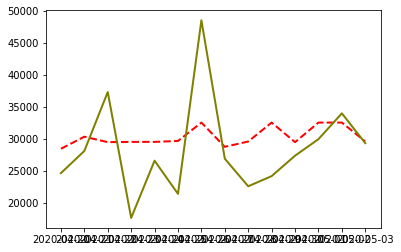

In [22]:
plt.plot( 'date', 'predict', data=RF_merge, marker='', color='red', linewidth=2, linestyle='dashed', label="predict")
plt.plot( 'date', 'real', data=RF_merge, marker='', color='olive', linewidth=2)

In [23]:
predict = forest.predict(final[predictors])

In [24]:
predict

array([28978.625     , 28978.625     , 28714.52380952, 28714.52380952,
       28978.625     , 29545.65909091, 29636.97916667, 29962.89285714,
       29636.97916667, 29962.89285714, 29545.65909091, 29962.89285714,
       29636.97916667, 29636.97916667])

In [25]:
final_merge = pd.concat([final['date'],pd.Series(predict)],axis=1)
final_merge = final_merge.rename(columns={0:'predict'})
final_merge

,date,predict
0,2020-05-04,28978.625000
1,2020-05-05,28978.625000
2,2020-05-06,28714.523810
3,2020-05-07,28714.523810
4,2020-05-08,28978.625000
5,2020-05-09,29545.659091
6,2020-05-10,29636.979167
7,2020-05-11,29962.892857
8,2020-05-12,29636.979167
9,2020-05-13,29962.892857


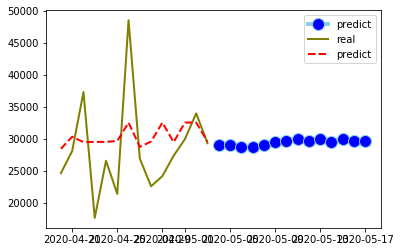

In [26]:
RF_merge["date"] = pd.to_datetime(RF_merge["date"])
plt.plot( 'date', 'predict', data=final_merge, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'date', 'real', data=RF_merge, marker='', color='olive', linewidth=2)
plt.plot( 'date', 'predict', data=RF_merge, marker='', color='red', linewidth=2, linestyle='dashed', label="predict")
plt.legend()
